<a href="https://colab.research.google.com/github/shiva5-git/bitcoinanalysis/blob/main/bitcoinanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load data
df = pd.read_csv("BTC-USD.csv")

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Overview
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3440 entries, 2014-09-17 to 2024-02-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3440 non-null   float64
 1   High       3440 non-null   float64
 2   Low        3440 non-null   float64
 3   Close      3440 non-null   float64
 4   Adj Close  3440 non-null   float64
 5   Volume     3440 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 188.1 KB
None
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821

In [3]:
import pandas as pd

# Load CSV
df = pd.read_csv("BTC-USD.csv")

# Clean column names
df.columns = df.columns.str.strip()

# Check column names
print(df.columns)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set as index
df.set_index('Date', inplace=True)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [5]:
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Drop rows with any missing values
df = df.dropna()

# OR: Fill missing values with forward fill
df = df.fillna(method='ffill')

Missing values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


<ipython-input-5-cbfe431e8023>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [6]:
duplicates = df.duplicated().sum()
print("Duplicate rows:", duplicates)

df = df.drop_duplicates()


Duplicate rows: 0


In [18]:
# Add 'Year' column from the datetime index
df['Year'] = df.index.year

# Group by Year and calculate max, mean, median of Close
yearly_max_close = df.groupby('Year')['Close'].max().sort_values(ascending=False)
yearly_avg_close = df.groupby('Year')['Close'].mean()
yearly_median_close = df.groupby('Year')['Close'].median()

# Top 10 years by highest maximum close
top_10_years = yearly_max_close.head(10)

print("Top 10 Years with Highest Max Close Price:\n", top_10_years)
print("\nYearly Average Close Price:\n", yearly_avg_close)
print("\nYearly Median Close Price:\n", yearly_median_close)


Top 10 Years with Highest Max Close Price:
 Year
2021    67566.828125
2024    51938.554688
2022    47686.812500
2023    44166.601563
2020    29001.720703
2017    19497.400391
2018    17527.000000
2019    13016.231445
2016      975.921021
2015      465.321014
Name: Close, dtype: float64

Yearly Average Close Price:
 Year
2014      363.693085
2015      272.453381
2016      568.492407
2017     4006.033629
2018     7572.298947
2019     7395.246282
2020    11116.378092
2021    47738.704400
2022    28251.006982
2023    28859.448250
2024    44175.062749
Name: Close, dtype: float64

Yearly Median Close Price:
 Year
2014      364.145005
2015      249.007004
2016      582.555999
2017     2589.409912
2018     6906.919922
2019     7824.231445
2020     9713.494629
2021    48188.150390
2022    23175.890625
2023    27767.236328
2024    43084.671875
Name: Close, dtype: float64


<ipython-input-19-11431e72a21d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_years.index.astype(str), y=top_10_years.values, palette='viridis')


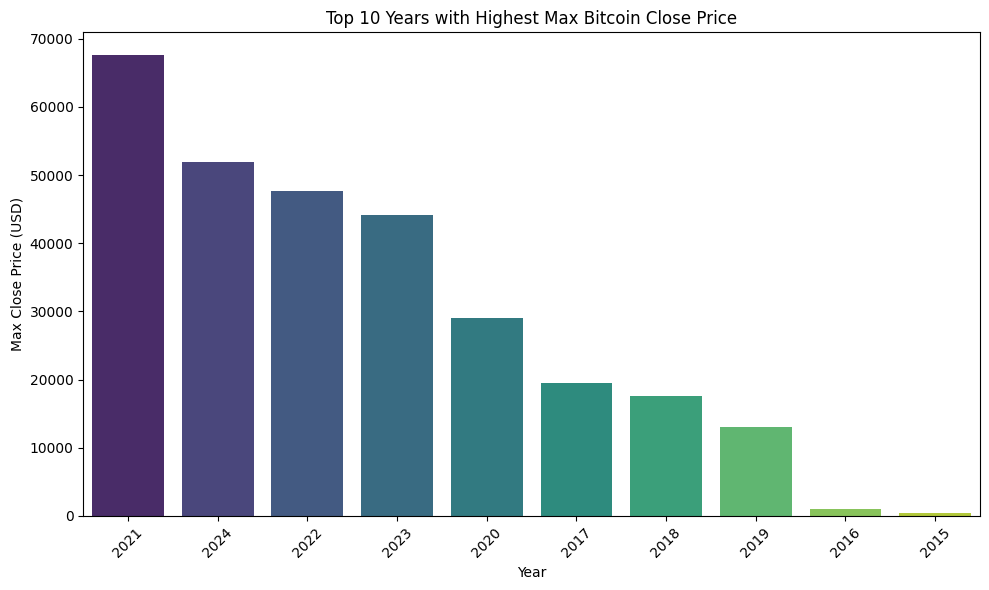

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'top_10_years' is already sorted
top_10_years = df.groupby('Year')['Close'].max().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_years.index.astype(str), y=top_10_years.values, palette='viridis')
plt.title('Top 10 Years with Highest Max Bitcoin Close Price')
plt.xlabel('Year')
plt.ylabel('Max Close Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


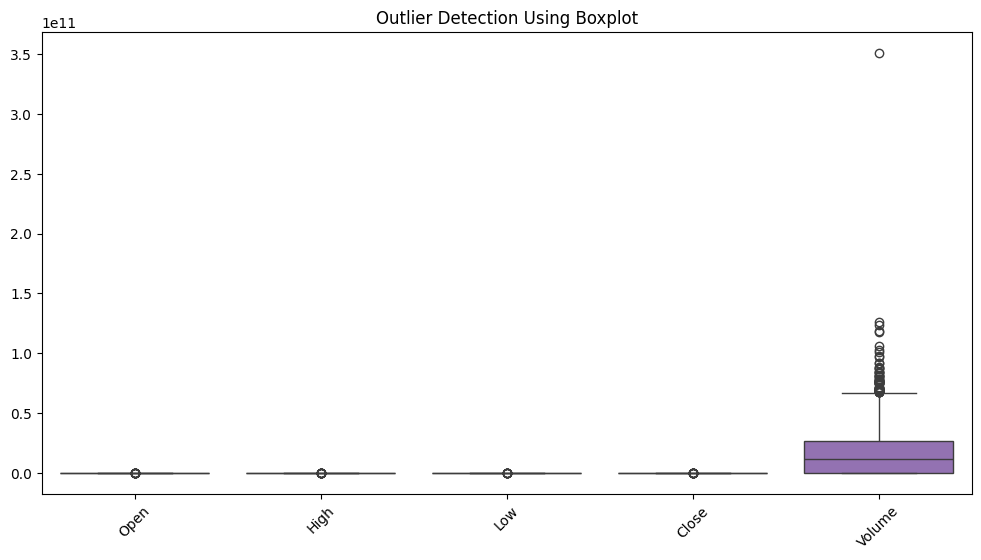

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close', 'Volume']])
plt.title("Outlier Detection Using Boxplot")
plt.xticks(rotation=45)
plt.show()


In [8]:
# Example: Remove rows where 'Volume' is above 99th percentile
threshold = df['Volume'].quantile(0.99)
df = df[df['Volume'] < threshold]

In [9]:
# Daily Return
df['Daily Return'] = df['Close'].pct_change()

# Rolling Average (7-day)
df['Rolling Mean'] = df['Close'].rolling(window=7).mean()

# 30-Day Moving Average
df['30D MA'] = df['Close'].rolling(window=30).mean()


In [10]:
print(df.describe())
print(df.info())


               Open          High           Low         Close     Adj Close  \
count   3405.000000   3405.000000   3405.000000   3405.000000   3405.000000   
mean   14692.098159  15027.394153  14350.441790  14711.683755  14711.683755   
std    16242.380167  16622.005978  15853.493971  16262.126422  16262.126422   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      919.810974    925.117004    902.223999    920.382019    920.382019   
50%     8255.730469   8423.250000   8079.700684   8253.690430   8253.690430   
75%    24201.765625  24822.628906  23693.919922  24307.841797  24307.841797   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  Daily Return  Rolling Mean        30D MA  
count  3.405000e+03   3404.000000   3399.000000   3376.000000  
mean   1.585753e+10      0.002078  14692.078628  14638.029392  
std    1.665658e+10      0.036891  16212.274871  16069.561032  
min    5.914570e+06     -0.37169

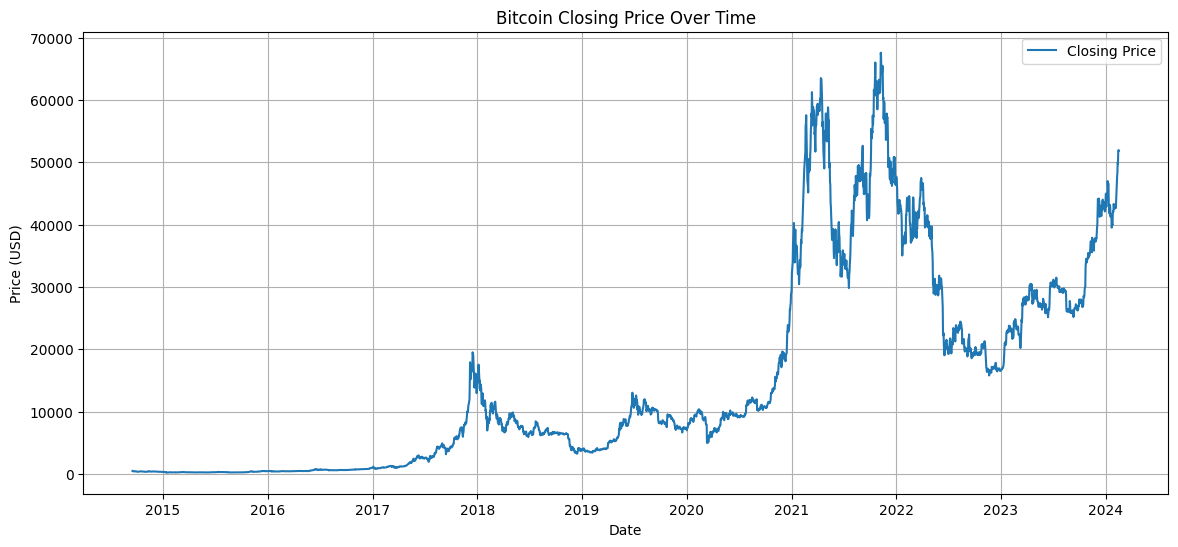

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()


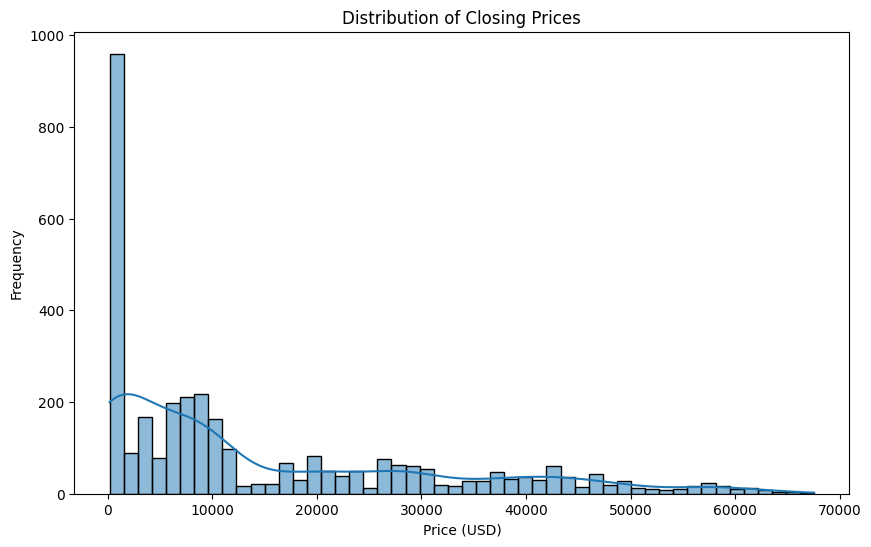

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


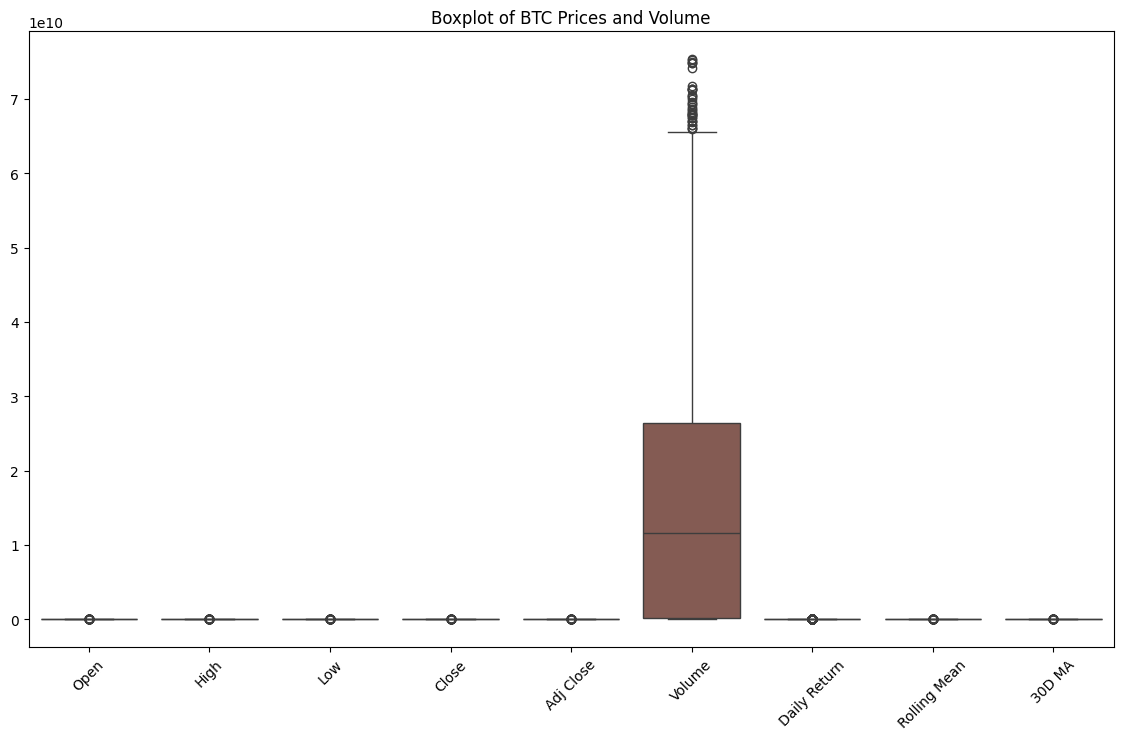

In [13]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df)
plt.title('Boxplot of BTC Prices and Volume')
plt.xticks(rotation=45)
plt.show()


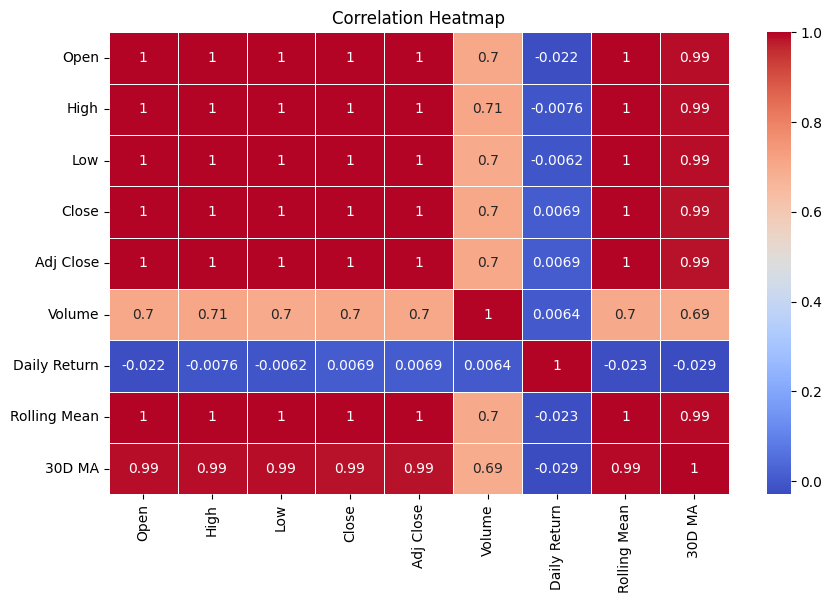

In [14]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
